In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)
# plt.rcParams["figure.figsize"] = (8,4)


In [35]:
## Read Log File
log_dir = 'experiment_agan_100_0_onlyg_i30'
with open('../checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
    log = f.read()

## Create directory for saved plots    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
## Save Plots    
SAVE = True

## Max number of plot iterations
MAX_ITER = 1000000000



In [36]:
llog = log.split('\n')
split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in llog]
# llog[:3]

In [37]:
llog[:3]

['================ Training Loss (Wed Mar 24 20:27:13 2021) ================',
 '(epoch: 1, iters: 32, t_comp: 0.046, t_load: 0.352) G_image: 0.810 G_person: 0.110 G_L1: 54.582 D_image_real: 0.781 D_image_fake: 0.862 D_person_real: 0.186 D_person_fake: 2.772 acc_D_image_real: 0.320 acc_D_image_fake: 0.680 acc_D_person_real: 0.960 acc_D_person_fake: 0.010 ',
 '(epoch: 2, iters: 32, t_comp: 0.014, t_load: 0.204) G_image: 0.782 G_person: 0.092 G_L1: 51.087 D_image_real: 0.781 D_image_fake: 0.867 D_person_real: 0.173 D_person_fake: 2.751 acc_D_image_real: 0.320 acc_D_image_fake: 0.700 acc_D_person_real: 0.960 acc_D_person_fake: 0.000 ']

In [38]:
# Create list of keys from log data
keys = [k.replace(':','') for k in split_llog[1] if ':' in k]
print('logged data:')
print(keys)

# Create empty dict for log data
log_dict = {k:[] for k in keys}
log_dict['i'] = []


# Populate log dict
count = 0
for entry in split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        log_dict['i'].append(count)
        count += 1
        key = ''
        for e in entry:
            if e[:-1] in keys:
                key = e[:-1]
            else:
                data = float(e) if '.' in e else int(e)
                log_dict[key].append(data)


# print(log_dict)

    

logged data:
['epoch', 'iters', 't_comp', 't_load', 'G_image', 'G_person', 'G_L1', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


In [39]:
count

100

---

## G_image loss plot

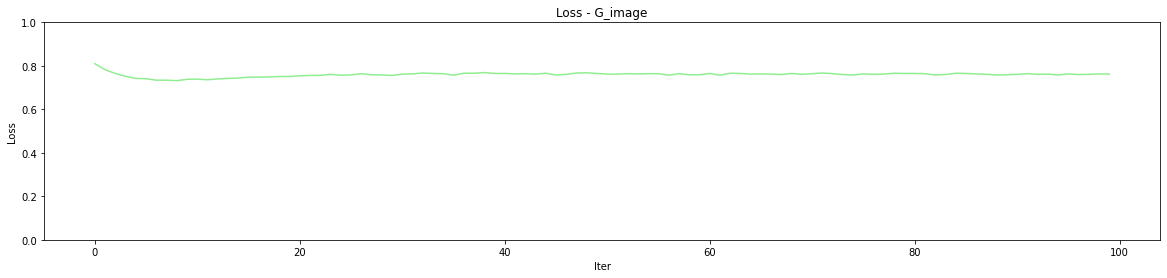

In [51]:
# Data for plotting
x = log_dict['i']
try:
    y = log_dict['G_image']
except:
    y = log_dict['G_GAN_image']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_image')
plt.ylim(0, 1)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_image.png")
plt.show()



## D_image_fake loss plot

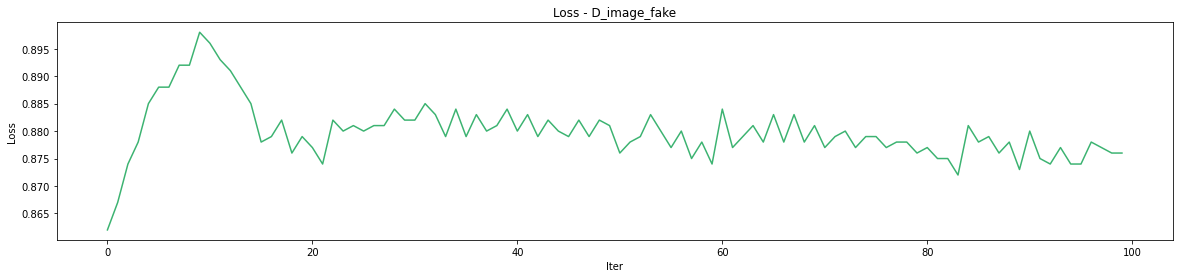

In [53]:
# Data for plotting
x = log_dict['i']
y = log_dict['D_image_fake']
fig, ax = plt.subplots()
ax.plot(x, y, 'mediumseagreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_fake')
# plt.ylim(0, 1)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_fake.png")
plt.show()

## D_image_real loss plot

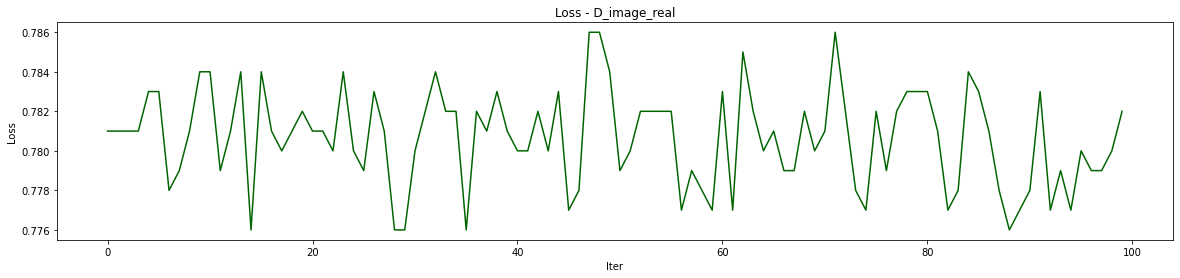

In [42]:
# Data for plotting
x = log_dict['i']
y = log_dict['D_image_real']
fig, ax = plt.subplots()
# ax.plot(x, y, 'forestgreen')
ax.plot(x, y, 'darkgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_real')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_real.png")
plt.show()

---
---
## G_person loss plot

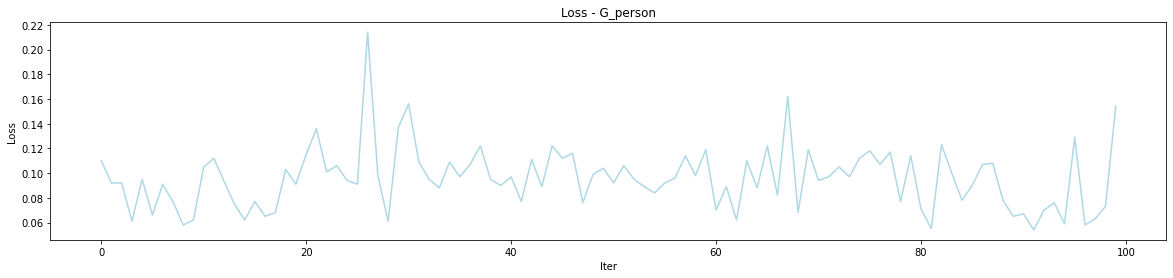

In [43]:
# Data for plotting
x = log_dict['i']
try:
    y = log_dict['G_person']
except:
    y = log_dict['G_GAN_person']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightblue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_person')

# plt.ylim(0, 4)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_person.png")
plt.show()

## D_person_fake loss plot

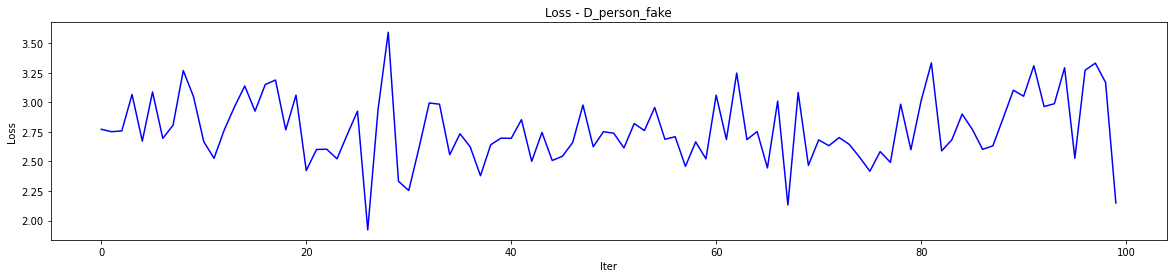

In [44]:
# Data for plotting
x = log_dict['i']
y = log_dict['D_person_fake']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'blue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_fake')
# ax.grid()
# plt.xlim(0, len(log_dict['iters']))
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_fake.png")
plt.show()

## D_person_real plot

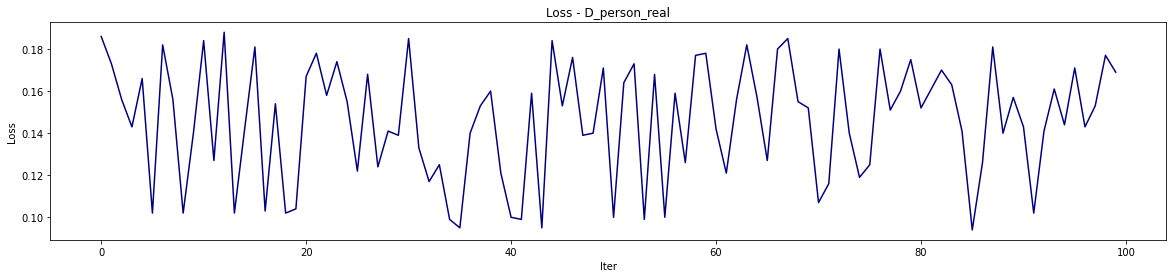

In [45]:
# Data for plotting
x = log_dict['i']
y = log_dict['D_person_real']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'navy')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_real')
# ax.grid()
# plt.xlim(0, len(log_dict['iters']))
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_real.png")
plt.show()

---
---
## G_L1 loss plot

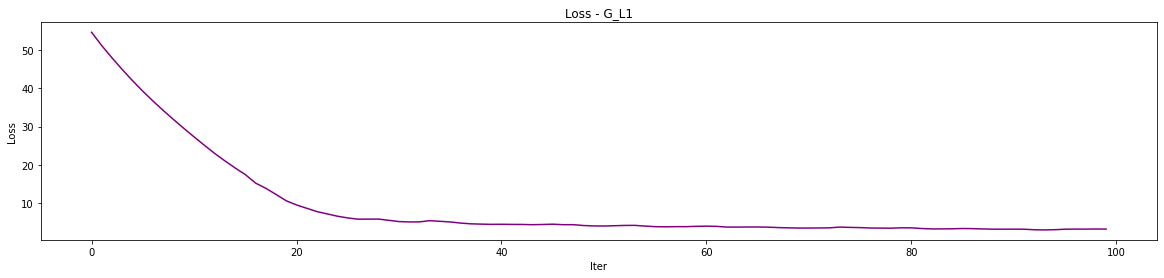

In [46]:
# Data for plotting
x = log_dict['i']
y = log_dict['G_L1']
fig, ax = plt.subplots()
ax.plot(x, y, 'purple')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_L1')
# plt.ylim(0, 10)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_L1.png")
plt.show()

---
---
## Accuracy Plot - D Image Fake

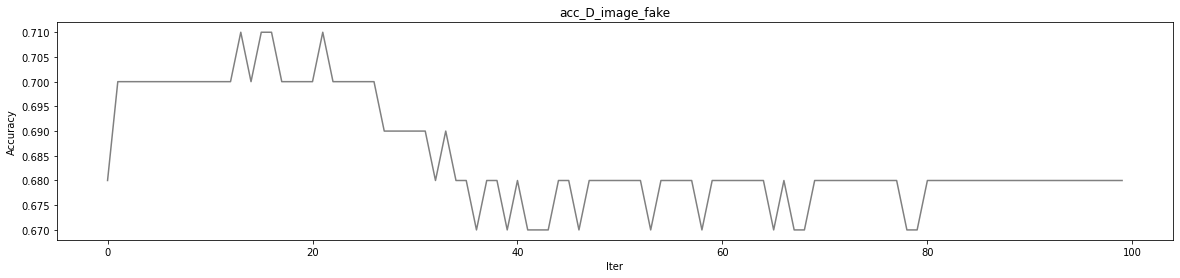

In [47]:
# Data for plotting
data_name = 'acc_D_image_fake'
x = log_dict['i']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Image Real

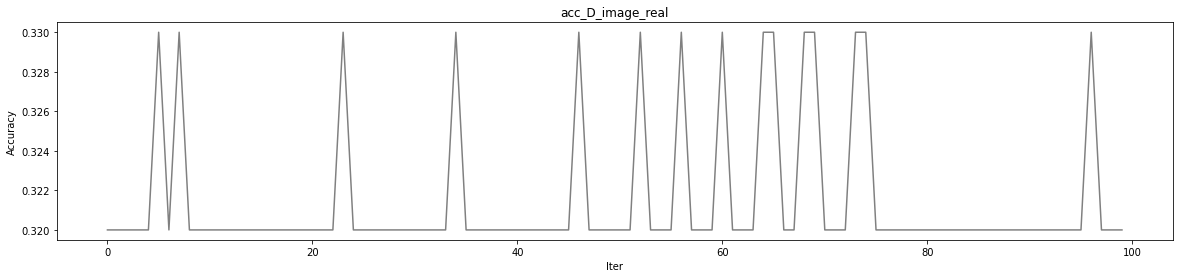

In [48]:
# Data for plotting
data_name = 'acc_D_image_real'
x = log_dict['i']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Fake

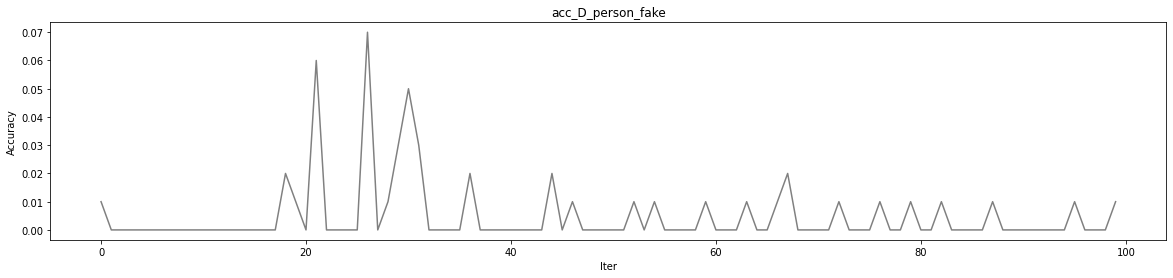

In [49]:
# Data for plotting
data_name = 'acc_D_person_fake'
x = log_dict['i']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Real

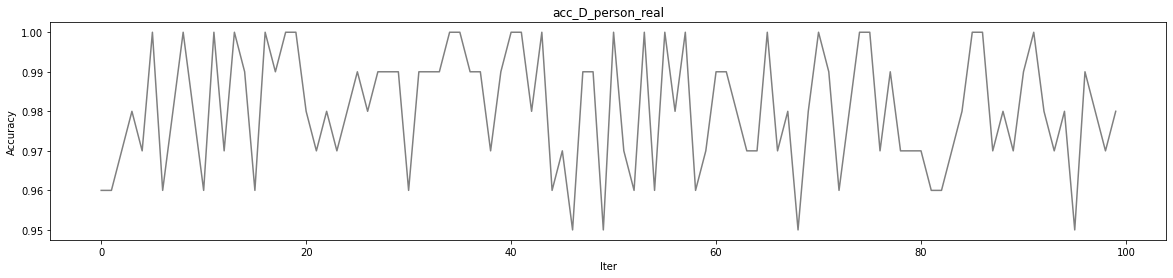

In [50]:
# Data for plotting
data_name = 'acc_D_person_real'
x = log_dict['i']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()